**Ridge regression**

Este modelo tiene la caracteristica de tener una pendiente muy pequeña, lo cual puede resultar beneficioso en la prediccion en modelos. (Si haces la prueba con una regresion clasica de minimos cuadrados ordinarios, la prediccion sera peor)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train , y_train)
print("Train accuracy: {}".format(ridge.score(X_train,y_train)))
print("Test accuracy: {}".format(ridge.score(X_test,y_test)))

Train accuracy: 0.8857966585170941
Test accuracy: 0.7527683481744751


c:\Users\ariel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

Se puede modificar al parametro alpha para cambiar al comportamiento de la regresión. Como valor por defecto, apha es igual a 1.0, pero si se este es aumentado la pendiente se acerca mas al cero y por el contrario si decrece, se aleja de este comportandose mas como una regresion lineal por minimos cuadaros ordinarios.

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Al aumentar alpha, la regresión se vuelve mas restrictiva, perdiendo generalidad (Es mas propensa a producir un overfitting)

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Al reducir el parametro alpha, la regresion tiende, en cambio, a ser menos restrictiva (Es mas propensa a un underfitting)

**Lasso Regression**

Esta regresión es similar a la regresion Ridge puesto que tambien hace acercar sus coeficientes a 0, con la particularidad de algunos si llegan a tener el valor 0 haciéndo que se eliminen. Esta regresión reduce el número de features, encontrando features sin relevancia

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Como se puede notar, el modelo resulta ser muy poco restrictivo para este caso, causando un underfitting, sin embargo se pueden solucionar reduciendo el parametro alpha, pero al hacer esto se debe aumentar el número máximo de iteraciones max_iter

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Si se reduce mucho el aplha puede llegar a un overfitting

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


# **Modelos lineales de clasificación**

**SVM y Logitic regression**

Ambos modelos actúan usando L2 Regularization (Ridge regression). Por esto cuentan con un parámetro **c** que actúa de la misma forma que el parámetro _alpha_

c:\Users\ariel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


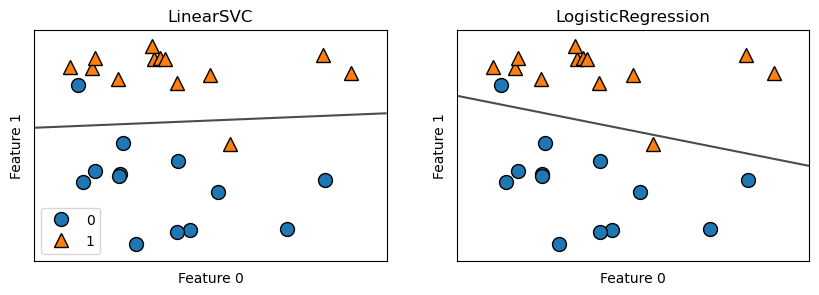

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


c:\Users\ariel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Notas de estudiante**

**Usando logistic regfression**

In [ ]:
route = 'data/student_exam_data.csv'

data = pd.read_csv(route)
print(data)

     Study Hours  Previous Exam Score  Pass/Fail
0       4.370861            81.889703          0
1       9.556429            72.165782          1
2       7.587945            58.571657          0
3       6.387926            88.827701          1
4       2.404168            81.083870          0
..           ...                  ...        ...
495     4.180170            45.494924          0
496     6.252905            95.038815          1
497     1.699612            48.209118          0
498     9.769553            97.014241          1
499     9.875897            66.760346          1

[500 rows x 3 columns]


In [ ]:
x = data[['Study Hours','Previous Exam Score']]
y = np.ravel(data[['Pass/Fail']])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=31)
logreg = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.868
Test set score: 0.860


In [ ]:
y_trainScore = []
y_testScore = []
for e in np.arange(0.1,100,0.1):
    l1 = LogisticRegression(C=e).fit(X_train,y_train)
    y_trainScore.append(l1.score(X_train,y_train))
    l2 = LogisticRegression(C=e).fit(X_test,y_test)
    y_testScore.append(l2.score(X_test,y_test))

y_trainScore = np.array(y_trainScore)
y_testScore = np.array(y_testScore)



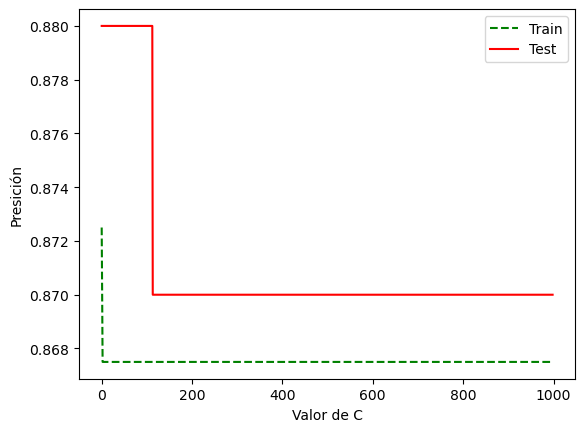

In [ ]:
import matplotlib.pyplot as plt

X_trainScore = np.arange(999)

plt.plot(X_trainScore,y_trainScore,ls="--",c='g',label='Train')
plt.plot(X_trainScore,y_testScore,c='r',label='Test')
plt.xlabel('Valor de C')
plt.ylabel('Presición')
plt.legend()
plt.show()